In [1]:
import xarray as xr
import numpy as np
import geopandas as gpd
import rasterio
import rioxarray as rio
from rasterstats import zonal_stats
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from shapely.geometry import point
import regionmask


C:\Users\User\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
ds=xr.open_dataset("C:\proj sif\TROPOSIF_L2B_2020-01-01.nc", group= 'PRODUCT')
ds

<xarray.Dataset>
Dimensions:        (time: 1, n_elem: 3092691)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-01
Dimensions without coordinates: n_elem
Data variables:
    delta_time     (n_elem) datetime64[ns] ...
    SIF_743        (n_elem) float32 ...
    SIF_Corr_743   (n_elem) float32 ...
    SIF_ERROR_743  (n_elem) float32 ...
    SIF_735        (n_elem) float32 ...
    SIF_Corr_735   (n_elem) float32 ...
    SIF_ERROR_735  (n_elem) float32 ...
    latitude       (n_elem) float32 ...
    longitude      (n_elem) float32 ...

In [3]:
SIF_743 = ds['SIF_743'].values
SIF_743

array([0.7626782 , 0.31396365, 0.17063966, ..., 0.09132421, 0.30846646,
       1.0057812 ], dtype=float32)

In [4]:
data_1d=SIF_743.ravel()
data_1d

array([0.7626782 , 0.31396365, 0.17063966, ..., 0.09132421, 0.30846646,
       1.0057812 ], dtype=float32)

In [5]:
ds.close()


In [6]:
lon = ds['longitude'].values
lon

array([  22.401075,   22.630943,   21.142496, ..., -159.63885 ,
       -159.60461 , -159.57034 ], dtype=float32)

In [9]:
lat = ds['latitude'].values
lat

array([-85.90832 , -85.95325 , -86.00765 , ...,  22.153814,  22.160917,
        22.167992], dtype=float32)

In [10]:
dat = pd.DataFrame({'lon': lon, 'lat': lat, 'SIF_743': SIF_743})
dat

,lon,lat,SIF_743
0,22.401075,-85.908318,0.762678
1,22.630943,-85.953247,0.313964
2,21.142496,-86.007652,0.170640
3,22.866854,-85.998070,0.348423
4,21.364904,-86.052917,0.201558
...,...,...,...
3092686,-159.352020,22.160625,2.628601
3092687,-159.673080,22.146683,0.581590
3092688,-159.638855,22.153814,0.091324
3092689,-159.604614,22.160917,0.308466


In [11]:
geom = gpd.points_from_xy(dat['lon'], dat['lat'], crs=4326)
dat = gpd.GeoDataFrame(data=dat[['SIF_743']], geometry=geom)
dat

,SIF_743,geometry
0,0.762678,POINT (22.40108 -85.90832)
1,0.313964,POINT (22.63094 -85.95325)
2,0.170640,POINT (21.14250 -86.00765)
3,0.348423,POINT (22.86685 -85.99807)
4,0.201558,POINT (21.36490 -86.05292)
...,...,...
3092686,2.628601,POINT (-159.35202 22.16063)
3092687,0.581590,POINT (-159.67308 22.14668)
3092688,0.091324,POINT (-159.63885 22.15381)
3092689,0.308466,POINT (-159.60461 22.16092)


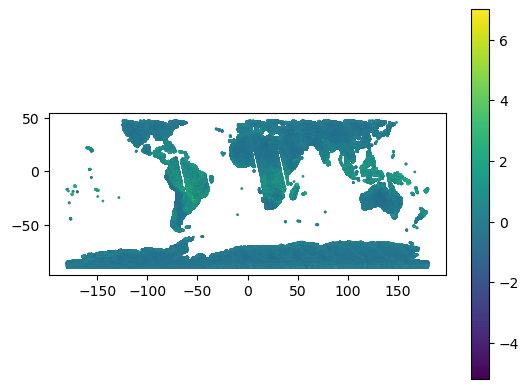

In [12]:
dat.plot(column='SIF_743', legend=True, markersize=1);